### SEGMENTATION WITH CLUSTERING AND PCA

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
data = pd.read_csv('cleaned_marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [16]:
data = data[data["Income"] != " "].copy()
data.reset_index(drop=True, inplace = True)

In [17]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Income'] = pd.to_numeric(data['Income'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [23]:
# generate age and length_of_patronage columns

data['age'] = 2025 - data["Year_Birth"]
data["length_of_patronage"] = [2025-x.year for x in data["Dt_Customer"]]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,13
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,11
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,12
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,11
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,11


In [24]:
# drop year_birth, id and Dt_Customer

data.drop(columns=["Year_Birth","ID","Dt_Customer"], inplace=True)

In [28]:
data['Marital_Status'] = ['Single' if x in ['Alone','Absurd','YOLO'] else
                          x for x in data['Marital_Status']]
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

In [29]:
cleaned_data = data.copy()

# encode the data 
encoder = LabelEncoder()

for column in list(data.select_dtypes(include='object').columns):
    data[column] = encoder.fit_transform(data[column])

In [33]:
# scaling.

scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data=data, columns = list(cleaned_data.columns))
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,-0.350527,0.253130,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443,1.500343
1,-0.350527,0.253130,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801,-1.417393
2,-0.350527,1.194297,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822,0.041475
3,-0.350527,1.194297,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.266777,-1.417393
4,1.429011,-0.688038,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.016420,-1.417393


In [34]:
# pca 


pca = PCA(n_components=3, random_state=23)
columns = ['col_1','col_2','col_3']
data = pca.fit_transform(data)

data = pd.DataFrame(data=data, columns=columns)
data.head()

,col_1,col_2,col_3
0,3.820632,0.218436,-0.291975
1,-2.433868,-0.231073,-0.316547
2,1.623851,-0.221575,-1.103518
3,-2.562849,-1.643803,0.235809
4,-0.491134,-0.227614,-0.501157


In [35]:
# kmeans

kmeans = KMeans(n_clusters=4, n_init="auto", random_state=23)
kmeans.fit(data)
preds = kmeans.labels_

In [37]:
px.scatter_3d(data_frame=data, x='col_1', y='col_2', z='col_3',
              color = preds)

In [39]:
cleaned_data['clusters'] = [f'cluster_{x}' for x in preds]
cleaned_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage,clusters
0,Graduation,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,cluster_0
1,Graduation,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,cluster_1
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,cluster_0
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,cluster_1
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,cluster_1


<Axes: xlabel='clusters', ylabel='Income'>

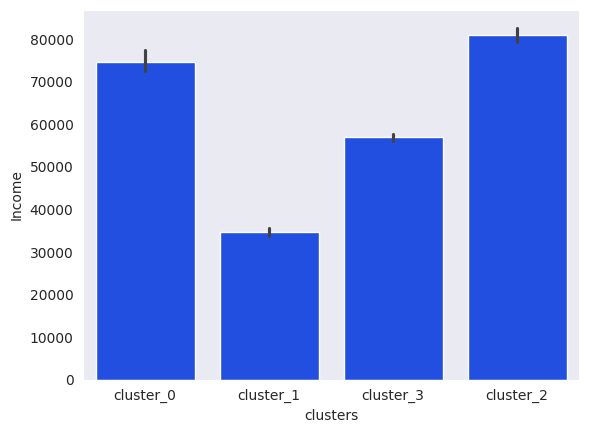

In [40]:
sns.set_style('dark')
sns.set_palette('bright')
sns.barplot(data=cleaned_data, x = 'clusters', y='Income')

<Axes: xlabel='clusters', ylabel='MntWines'>

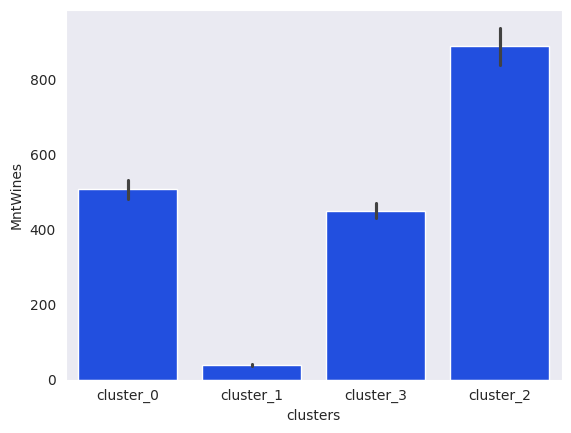

In [41]:
sns.barplot(data=cleaned_data, x = 'clusters', y='MntWines')

<Axes: xlabel='clusters', ylabel='children'>

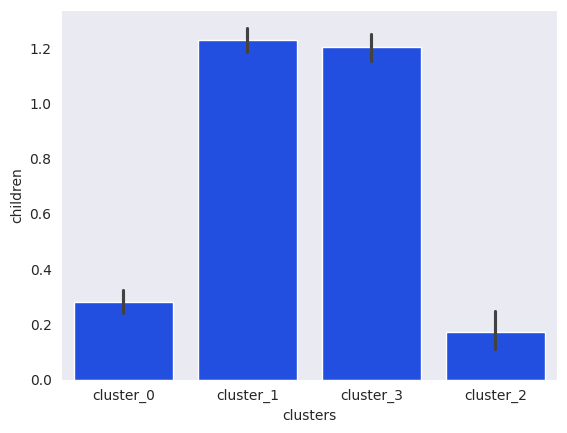

In [47]:
cleaned_data['children'] = cleaned_data['Kidhome'] + cleaned_data['Teenhome']
sns.barplot(data=cleaned_data, x = 'clusters', y='children')

<Axes: xlabel='clusters', ylabel='count'>

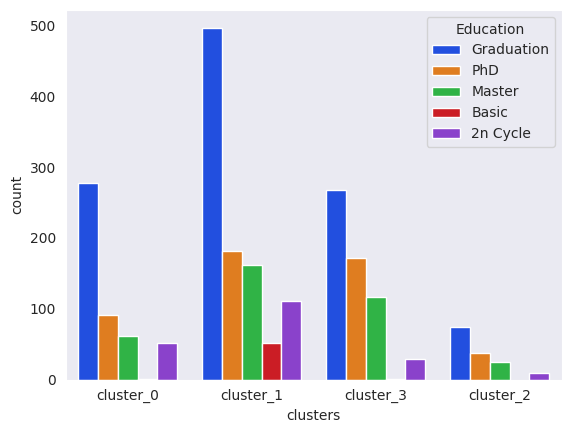

In [48]:
sns.countplot(data=cleaned_data, x = 'clusters', hue='Education')